<a href="https://colab.research.google.com/github/arqPy/PDS/blob/main/Transformada_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# transformada z de x[n]u[n]
import sympy as sym

# INGRESO
z = sym.symbols('z')
n = sym.symbols('n', positive=True)
a = sym.symbols('a')
u = sym.Heaviside(n)

fn = (a**n)*u

# valor a como racional en dominio 'ZZ' enteros
a_k = sym.Rational(1/2).limit_denominator(100)
m   = 7        # Términos a graficar
muestras = 101 # dominio z

# PROCEDIMIENTO
fnz = fn*(z**(-n)) # f(n,z) para sumatoria
# sumatoria transformada z
Fz_sum = sym.summation(fnz,(n,0,sym.oo))
Fz_eq  = Fz_sum.args[0]  # primera ecuacion e intervalo
Fz = Fz_eq[0].simplify() # solo expresion

ROC = Fz_eq[1]  # condicion ROC

# polos y ceros de Fz
[P,Q] = Fz.as_numer_denom()
P = sym.poly(P,z)
Q = sym.poly(Q,z)
P_ceros = sym.roots(P)
Q_polos = sym.roots(Q)

# SALIDA
print('f[n]: ')
sym.pprint(fn)
print('\n F[z] desde sumatoria:')
sym.pprint(Fz_eq)
print('\n F[z] simplificada')
sym.pprint(Fz)
print('\n ROC: ')
sym.pprint(ROC)
print('\n {Q_polos:veces}:',Q_polos)
print(' {P_ceros:veces}:',P_ceros)

f[n]: 
 n
a 

 F[z] desde sumatoria:
⎛   1     │a│    ⎞
⎜───────, │─│ < 1⎟
⎜  a      │z│    ⎟
⎜- ─ + 1         ⎟
⎝  z             ⎠

 F[z] simplificada
  z   
──────
-a + z

 ROC: 
│a│    
│─│ < 1
│z│    

 {Q_polos:veces}: {a: 1}
 {P_ceros:veces}: {0: 1}


In [ ]:
import scipy.signal as sgn
import numpy as np

In [ ]:

a = np.convolve([0,1,2,3,4,5],[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) # [1, 0,0,0,0,0]

a

array([ 0,  1,  3,  6, 10, 15, 15, 15, 15, 15, 15, 15, 15, 14, 12,  9,  5])

In [ ]:
b = [-4, 8 ]
a = [1, 6, 8]
[r,p,k] = sgn.residue(b, a)
print(r, p, k)

[  8. -12.] [-2. -4.] []


In [ ]:
b = [ -1, 0, 0, 0, 0, 6,-5 ]
a = np.polymul([1,-1], [1, -1])
a = np.polymul([1, -1], a)
a = np.polymul([1, 0,0,0,0,0], a)
[r,p,k] = sgn.residue(b, a)
print("Resíduos\n", r)
print("Polos\n", p)
print(k)

Resíduos
 [ 1.50000000e+01-0.j  1.40000000e+01-0.j  1.20000000e+01-0.j
  9.00000000e+00-0.j  5.00000000e+00-0.j -1.50000000e+01+0.j
  6.21724894e-15+0.j  0.00000000e+00+0.j]
Polos
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 1.+0.j 1.+0.j]
[]


$$y[n] = x[n]*g[n]$$

$$Y(z) = \frac{-z^6 + 6z - 5}{z^5(z - 1)^3}$$

$$
H(z) = 15z^{-1} + 14z^{-2} + 12z^{-3} + 9z^{-4} + 5z^{-5} - \frac{15}{z - 1} + 0 + 0
$$

$$h[n] = 15\delta{[n-1]} + 14\delta{[n-2]} + 12\delta{[n-3]} + 9\delta{[n-4]} + 5\delta{[n-5]} + 15u[-n]$$

In [ ]:
b = [ 2, -11, 12 ]
a = np.polymul([1,-1], [1, -2])
a = np.polymul([1, -2], a)
a = np.polymul([1, -2], a)
[r,p,k] = sgn.residue(b, a)
print("Resíduos\n", r)
print("Polos\n", p)
print(k)

Resíduos
 [-3.+0.j  3.+0.j -1.+0.j -2.+0.j]
Polos
 [1.+0.j 2.+0.j 2.+0.j 2.+0.j]
[]


In [ ]:
n = np.array([1, 11, 26, 16]) # definindo um polinômio de terceiro grau
#n = 1 11 26 16
raizes = np.roots(n)
print(raizes) # -8. -2. -1.
print(np.poly(raizes)) # polinômio a partir das raízes
n = [1, 8, 19, 12]
print(np.convolve(n,[1, 8])) # multiplicação polinomial

[-8. -2. -1.]
[ 1. 11. 26. 16.]
[  1  16  83 164  96]


In [ ]:
from numpy import *
from scipy.signal import *

num = array([1, 1])
den = convolve(array([1,0]),array([1,2]))
# ou: den = array([1,2,0]) # z^2 + 2z = z.(z+2)
r, p, k = residue(num,den)
print(r, p, k)
#[ 0.5 0.5] [-2. 0.] [ 0.]


[0.5 0.5] [ 0. -2.] []


In [ ]:
# Raizes Reais Repetidas
num = array([1, 0, 1])
den = poly([0, 0, -2])
r, p, k = residue(num,den)
print(r, p, k)
#[ 1.25 -0.25 0.5 ] [-2. 0. 0.] [ 0.]

[-0.25  0.5   1.25] [ 0.  0. -2.] []


In [ ]:
# Ordem do Numerador maior ou igual a ordem do Denominador
num = array([3,2,3])
den = array([1,3,2])
r, p, k = residue(num,den)
print (r, p, k)
#[-11. 4.] [-2. -1.] [ 3.]

[  4. -11.] [-1. -2.] [3.]


In [ ]:
# Raízes Complexas Conjugadas
num = array([5,8,-5])
den = convolve(array([1,0,0]), array([1,2,5]))
r, p, k = residue(num,den)
print (r, p, k)
#[ 2.+0.j -1.+0.j -1.-1.j -1.+1.j] [ 0.+0.j 0.+0.j -1.+2.j -1.-2.j] [ 0.]

[ 2.+0.j -1.+0.j -1.-1.j -1.+1.j] [ 0.+0.j  0.+0.j -1.+2.j -1.-2.j] []


(-1.0, 6.0)

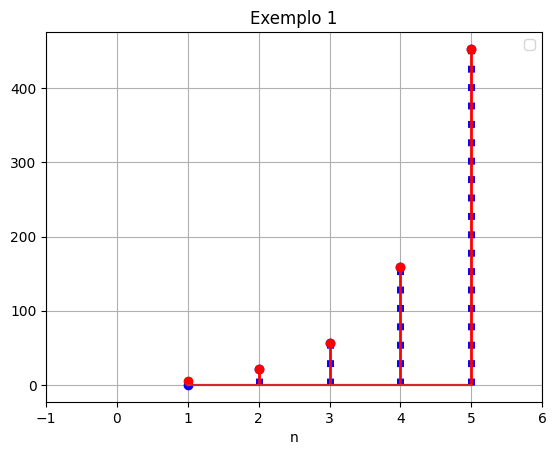

In [ ]:
import numpy as np
import matplotlib.pylab as plt
n = np.arange(1,6)
x1 = 3.*2**(n-1) + 5.*3**(n-1); x1[0] = 0
x2 = (3.*2**n)/2. + (5.*3**n)/3.; x2[0] = x2[0] - 19./6
marker, stemline, base = plt.stem(n,x1,'b:'); plt.grid('on')
plt.setp(stemline, linewidth=5)
marker, stemline, base = plt.stem(n,x2,'r')
plt.setp(stemline, linewidth=2)
plt.legend(loc='upper right') #'x1[n]','x2[n]')
plt.xlabel('n'); plt.title('Exemplo 1'); plt.xlim(-1., 6.0)

In [ ]:
def u(n, n0=0):
  u1 = np.zeros(len(n))     # todas amostras zero
  u1[n >= n0] = 1.          # amostras UM
  return u1

def rampa(n, Li=0, W=5, n0=0):
  '''
  n: tempo discreto
  n0: deslocamento
  '''
  Ls = Li + W + 1
  x = (n - n0)*(u(n, Li+n0) - u(n, Ls+n0))
  return x



<ipython-input-11-6ef670a39139>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(511)


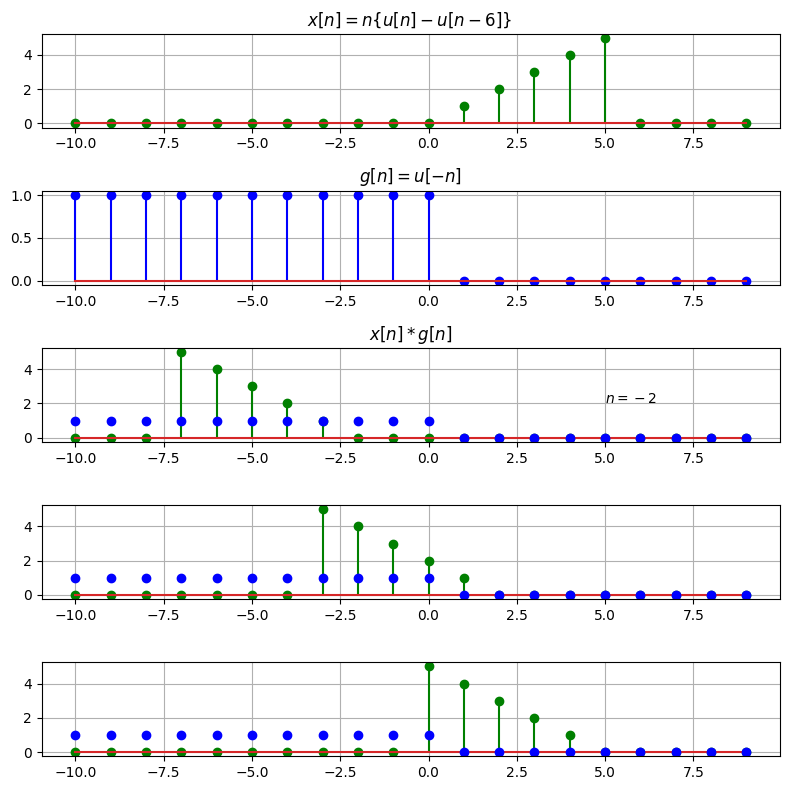

In [ ]:
import numpy as np
import matplotlib.pylab as plt
n = np.arange(-10,10)

Li, W = 0, 5
x = rampa(n, Li, W)
g = u(-n)

plt.subplots(figsize=(8,8));         # estipula espaço físico para os gráficos

tit = "$x[n] = n\{u[n]- u[n-6]\}$ "
plt.subplot(511)
plt.stem(n,x,'g')
plt.title(tit)
plt.grid('on')

plt.subplot(512)
plt.stem(n,g, 'b')
plt.title("$g[n] = u[-n]$")
plt.grid('on')



#Inversão e deslocamento
n0 = 2
x2 = rampa(-n, Li, W, n0)

plt.subplot(513)
plt.stem(n,x2, 'g')
plt.plot(n, g, 'bo')
plt.title("$x[n]*g[n]$")
plt.text(5,2,"$n = -2$")
plt.grid('on')

n0 = -2
x2 = rampa(-n, Li, W, n0)

plt.subplot(514)
plt.stem(n,x2, 'g')
plt.plot(n, g, 'bo')
plt.grid('on')

n0 = -5
x2 = rampa(-n, Li, W, n0)

plt.subplot(515)
plt.stem(n,x2, 'g')
plt.plot(n, g, 'bo')
plt.grid('on')

plt.tight_layout()
